In [94]:
import tensorflow as tf
import keras
import numpy as np
import os
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import seaborn as sns

import scipy.stats as sc_stats

In [95]:
print(tf.__version__)

1.13.1


# LSTM Prospect Theory


## Preprocess data

In [96]:
# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/example_RKN"
# file_name = file_path + "/subj_num_39.csv"
# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subj_num_39"
# file_name = file_path + "/experiment_data.csv"

file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_15/"
file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_15/experiment_data.csv"
file_dopa_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/dopadata/subject_num_15/dopa_experiment_data.csv"

In [5]:
os.listdir(file_path)

['PT_result.mat',
 'LSTM_metrics_all_subjs.csv',
 'loglikelihoods_all',
 'LSTM_metrics_10neurons.csv',
 'LSTM_metrics.csv',
 'experiment_data.csv']

In [97]:
task_df = pd.read_csv(file_name)
task_df.head(10)

,TrialNum,SideOfScreen,Safe,BigRisky,SmallRisky,SideChosen,Choice,Outcome,RT,Happiness
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683594
1,1,1.0,-35.0,0.0,-175.0,2.0,0.0,-35.0,1.346,NaN
2,2,1.0,-15.0,0.0,-37.0,2.0,0.0,-15.0,1.848,NaN
3,3,1.0,-15.0,0.0,-27.0,1.0,1.0,-27.0,1.504,NaN
4,4,1.0,15.0,42.0,0.0,1.0,1.0,0.0,1.477,0.648438
5,5,1.0,-25.0,0.0,-56.0,2.0,0.0,-25.0,1.719,NaN
6,6,1.0,0.0,65.0,-65.0,1.0,1.0,-65.0,1.431,NaN
7,7,1.0,0.0,30.0,-45.0,2.0,0.0,0.0,1.549,NaN
8,8,1.0,-25.0,0.0,-56.0,2.0,0.0,-25.0,1.824,0.627604
9,9,1.0,0.0,80.0,-66.0,1.0,1.0,80.0,1.295,NaN


In [98]:
task_df.shape

(301, 10)

In [99]:
dopa_task_df = pd.read_csv(file_dopa_name)
dopa_task_df.head(10)

,TrialNum,SideOfScreen,Safe,BigRisky,SmallRisky,SideChosen,Choice,Outcome,RT,Happiness
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578125
1,1,2.0,15.0,54.0,0.0,2.0,1.0,0.0,1.418,NaN
2,2,2.0,0.0,30.0,-20.0,2.0,1.0,30.0,1.327,NaN
3,3,2.0,-15.0,0.0,-75.0,1.0,0.0,-15.0,1.845,NaN
4,4,2.0,-35.0,0.0,-175.0,1.0,0.0,-35.0,1.033,0.552083
5,5,2.0,20.0,36.0,0.0,1.0,0.0,20.0,1.798,NaN
6,6,2.0,-35.0,0.0,-126.0,1.0,0.0,-35.0,1.623,NaN
7,7,2.0,35.0,111.0,0.0,2.0,1.0,0.0,1.872,0.549479
8,8,2.0,30.0,84.0,0.0,2.0,1.0,0.0,1.725,NaN
9,9,2.0,30.0,150.0,0.0,2.0,1.0,150.0,0.999,NaN


In [44]:
## for running a batch of all subjects

In [100]:
all_subj_data_df = pd.DataFrame()
all_subj_dopa_data_df = pd.DataFrame()

for subj_num in range(11,27):
#     print(subj_num)
    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/experiment_data.csv"
    all_subj_data_df = all_subj_data_df.append(pd.read_csv(file_name))
    file_dopa_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/dopadata/subject_num_" + str(subj_num) + "/dopa_experiment_data.csv"
    all_subj_dopa_data_df = all_subj_dopa_data_df.append(pd.read_csv(file_dopa_name))
    
    

In [101]:
# all_subj_data_df.shape

In [102]:
# all_subj_data_df.tail(10)

In [103]:
task_df  = all_subj_data_df
dopa_task_df = all_subj_dopa_data_df

In [104]:
def add_releveant_features(task_df):


    task_df['PrevOutcome']=task_df['Outcome'].shift(1)
    task_df.loc[1,'PrevOutcome']= 0

    task_df['PrevChoice']=task_df['Choice'].shift(1)
    task_df.loc[1,'PrevChoice']= 0

    task_df['PrevSafe']=task_df['Safe'].shift(1)
    task_df.loc[1,'PrevSafe']= 0

    task_df['PrevBigRisky']=task_df['BigRisky'].shift(1)
    task_df.loc[1,'PrevBigRisky']= 0

    task_df['PrevSmallRisky']=task_df['SmallRisky'].shift(1)
    task_df.loc[1,'PrevSmallRisky']= 0
    
    return task_df

task_df = add_releveant_features (task_df)
dopa_task_df = add_releveant_features(dopa_task_df)

In [105]:
# dopa_task_df.head(10)

## define task parameters

In [106]:
time_steps = 300
inputs = 8
outputs = 2

# adjust target(t) to depend on input (t-1)
# df.Property = df.Property.shift(-1)


# # # remove nans as a result of the shifted values
# df = df.iloc[:-1,:]
# df = df.values

In [107]:
time_steps

300

In [108]:
# np.arange(0,task_df.shape[0],301)

In [109]:
# label_encoder = LabelEncoder()
# label_encoder.fit_transform(train_y)

In [110]:
# task_df.loc[task_df.TrialNum!=0,:]

In [111]:
# dopa_task_df.shape[0]

## train_X, trainY

In [76]:
# include_ind = np.setdiff1d(np.arange(task_df.shape[0]),np.arange(0,task_df.shape[0],301))
# include_ind = np.arange(1,task_df.shape[0])
# X_y_split
## TRAIN
# train_X = task_df.loc[include_ind,['Safe','BigRisky','SmallRisky']].values
# train_y = task_df.loc[include_ind,['Choice']].values.astype(np.int32)


# train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky']].values
train_y = task_df.loc[task_df.TrialNum!=0,['Choice']].values.astype(np.int32)


# ## TEST
# test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky']].values
test_y = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Choice']].values.astype(np.int32)

train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values
test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values

extra_features = 5;



# # center and scale
scaler = MinMaxScaler(feature_range=(0, 1))    
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

train_X[0,-extra_features + 1:]= 0;



# # reshape input to 3D array
# train_X = train_X[None,:,:]
# test_X = test_X[None,:,:]


train_X = train_X.reshape(-1,time_steps,inputs)
test_X = test_X.reshape(-1,time_steps,inputs)



# # one-hot encode the outputs

onehot_encoder = OneHotEncoder()
encode_categorical = train_y.reshape(len(train_y), 1)
encode_categorical_test = test_y.reshape(len(test_y), 1)

train_y = onehot_encoder.fit_transform(encode_categorical).toarray()
test_y = onehot_encoder.fit_transform(encode_categorical_test).toarray()

train_y =  train_y.reshape(-1,time_steps,outputs)
test_y =  test_y.reshape(-1,time_steps,outputs)



# train_y = train_y[None,:,:]
# test_y = test_y[None,:,:]

/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [77]:
# task_df.shape[1]

In [78]:
train_X.shape

(16, 300, 8)

In [79]:
train_y.shape

(16, 300, 2)

In [80]:
# train_y

In [81]:
# print(train_X)
# print(train_y)

In [82]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(16, 300, 8)
(16, 300, 2)
(16, 300, 8)
(16, 300, 2)


In [85]:
# test_X

## Construction phase

In [90]:
learning_rate = 0.000001
epochs = 2000
batch_size = int(train_X.shape[0])
he_init = tf.variance_scaling_initializer()


print(batch_size)


length = train_X.shape[0]
display = 10 ## display loss function every display trials
neurons = 100 ## number of neurons in LSTM cell
save_step = 100


best_loss_val = np.infty
checks_since_last_progress = 0
max_checks_without_progress = 20

# # clear graph (if any) before running
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, time_steps, inputs])
y = tf.placeholder(tf.float32, [None, time_steps, outputs])

print(X.shape)
print(y.shape)

# LSTM Cell
cell = tf.contrib.rnn.BasicLSTMCell(num_units=neurons, activation=tf.nn.relu)
cell_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# # pass into Dense layer
stacked_outputs = tf.reshape(cell_outputs, [-1, time_steps,neurons])
out = tf.layers.dense(inputs=stacked_outputs, units=outputs) ## logits layer kernel_initializer=he_init

print(out.shape)

probability = tf.nn.softmax(out)


# squared error loss or cost function for linear regression
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        labels=y, logits=out))



# # optimizer to minimize cost
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


16
(?, 300, 8)
(?, 300, 2)
(?, 300, 2)


In [91]:
print(tf.argmax(y,2))
print(tf.arg_max(out,2))

Tensor("ArgMax:0", shape=(?, 300), dtype=int64)
Tensor("ArgMax_1:0", shape=(?, 300), dtype=int64)


## define Metrics

In [92]:
accuracy = tf.metrics.accuracy(labels =  tf.argmax(y, 2),
                          predictions = tf.argmax(out, 2),
                          name = "accuracy")
# print(accuracy) -- this is a tuple
acc_up,acc_val = accuracy

precision = tf.metrics.precision(labels=tf.argmax(y, 2),
                                 predictions=tf.argmax(out, 2),
                                 name="precision")
prec_up,prec_val = precision


recall = tf.metrics.recall(labels=tf.argmax(y, 2),
                           predictions=tf.argmax(out, 2),
                           name="recall")

auc = tf.metrics.auc(labels=tf.argmax(y, 2),
                           predictions=tf.argmax(out, 2),
                           name="auc")
f1 = 2 * accuracy[1] * recall[1] / ( precision[1] + recall[1] )

## Execution phase

In [93]:
# with tf.Session() as sess:
#     saver.restore(sess, "./checkpts/RNN_LST_model_subject_num_11_final.ckpt")

with tf.Session() as sess:
    # initialize all variables
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()

    # Train the model
    for steps in range(epochs):
        mini_batch = zip(range(0, length, batch_size),
                   range(batch_size, length+1, batch_size))

        # train data in mini-batches
        for (start, end) in mini_batch:
            # print(train_y[start:end,:])
            sess.run(training_op, feed_dict = {X: train_X[start:end,:,:],
                                               y: train_y[start:end,:,:]})

        # print training performance 
        if (steps+1) % display == 0:
            # evaluate loss function on training set
            loss_fn = loss.eval(feed_dict = {X: train_X, y: train_y})
            print('Step: {}  \tTraining loss: {}'.format((steps+1), loss_fn))
            
            acc_train = acc_val.eval(feed_dict={X: train_X, y: train_y})
            print('Step: {}  \tTraining accuracy: {}'.format((steps+1), acc_train))
            
            
            acc_test = acc_val.eval(feed_dict={X: test_X, y: test_y})
            print('Step: {}  \tTest accuracy: {}'.format((steps+1), acc_test))
            
            loss_test = loss.eval(feed_dict={X: test_X, y: test_y})
            print('Step: {}  \tTest loss: {}'.format((steps+1), loss_test))
            
            
#             prec_test = prec_val.eval(feed_dict={X: train_X, y: train_y})
#             print('Step: {}  \tTraining Precision: {}'.format((steps+1), prec_test))

            if loss_fn < best_loss_val:
                    best_loss_val = loss_fn
                    checks_since_last_progress = 0
            else:
                    checks_since_last_progress += 1
        
        
        ## EARLY STOPPING
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

            
        if (steps+1) % save_step ==0:
            save_path = saver.save(sess, "./checkpts/RNN_LST_model_all_subjects_all_features.ckpt")
        
        
        
    # evaluate model accuracy
    acc, prec, recall, f1,auc = sess.run([accuracy, precision, recall, f1,auc],
                                     feed_dict = {X: train_X, y: train_y})
    probchoice = probability.eval(feed_dict = {X: train_X, y: train_y})
    prob_test = probability.eval(feed_dict = {X: test_X, y: test_y})

    print('\nEvaluation  on training set')
    print('Accuracy:', acc[1])
    print('Precision:', prec[1])
    print('Recall:', recall[1])
    print('F1 score:', f1)
    print('AUC:', auc[1])
    
#     print("probability",probchoice)
    
    save_path = saver.save(sess, "./checkpts/RNN_LST_model_all_subjects_all_features.ckpt")

    

metric_out_df= pd.DataFrame(np.array([acc[1],prec[1],recall[1],f1,auc[1],loss_fn,acc_test,loss_test,neurons,learning_rate,epochs]).reshape(-1,11),columns =["accuracy","precision","recall","f1_score","auc","loss","accuracy_test","loss_test","neurons","learning_rate","n_epochs"])    

Step: 10  	Training loss: 0.6990088820457458
Step: 10  	Training accuracy: 0.48625001311302185
Step: 10  	Test accuracy: 0.49291667342185974
Step: 10  	Test loss: 0.6970481872558594
Step: 20  	Training loss: 0.6985108256340027
Step: 20  	Training accuracy: 0.4906249940395355
Step: 20  	Test accuracy: 0.49286457896232605
Step: 20  	Test loss: 0.6966959834098816
Step: 30  	Training loss: 0.6980476975440979
Step: 30  	Training accuracy: 0.49149999022483826
Step: 30  	Test accuracy: 0.4928472340106964
Step: 30  	Test loss: 0.6963756680488586
Step: 40  	Training loss: 0.6976175904273987
Step: 40  	Training accuracy: 0.4918749928474426
Step: 40  	Test accuracy: 0.4928385317325592
Step: 40  	Test loss: 0.6960852146148682
Step: 50  	Training loss: 0.6972169876098633
Step: 50  	Training accuracy: 0.492083340883255
Step: 50  	Test accuracy: 0.49283334612846375
Step: 50  	Test loss: 0.6958203911781311
Step: 60  	Training loss: 0.6968428492546082
Step: 60  	Training accuracy: 0.4922159016132355
St

KeyboardInterrupt: 

In [ ]:
np.sum(probchoice[0,0,:])

In [450]:
probchoice.shape

(1, 300, 2)

In [453]:
## for a specific subject
ll = np.dot(train_y[0,:,0],np.log(probchoice[0,:,0]+0.0001)) + np.dot(train_y[0,:,1],np.log(probchoice[0,:,1]+0.0001))
print(ll)

-198.71244114637375


In [455]:
1 - ll/(np.log(0.5)*300)

0.04439515531728855

In [457]:
probchoice.shape

(1, 300, 2)

In [ ]:
prob

In [397]:
loglike_train=[]; loglike_test =[];
for subj_num in range(11,27):
    loglike_train.append(np.dot(train_y[subj_num-11,:,0],np.log(probchoice[subj_num-11,:,0]+0.0001)) + np.dot(train_y[subj_num-11,:,1],np.log(probchoice[subj_num-11,:,1]+0.0001)) )
    loglike_test.append(np.dot(test_y[subj_num-11,:,0],np.log(prob_test[subj_num-11,:,0]+0.0001)) + np.dot(test_y[subj_num-11,:,1],np.log(prob_test[subj_num-11,:,1]+0.0001)) )


In [398]:
loglike_train

[-207.22490936517715,
 -204.16755259037018,
 -208.8415709733963,
 -211.44044595956802,
 -206.97302973270416,
 -205.5558995604515,
 -202.69466334581375,
 -205.08332860469818,
 -204.75412076711655,
 -203.12668985128403,
 -199.87487679719925,
 -201.63625067472458,
 -204.39146316051483,
 -209.07946574687958,
 -197.55535835027695,
 -200.58777582645416]

In [399]:
loglike_test

[-206.7261511683464,
 -201.95139640569687,
 -206.31595557928085,
 -209.46393805742264,
 -206.60465663671494,
 -205.7004160284996,
 -205.74884968996048,
 -211.57007431983948,
 -203.55105710029602,
 -203.57157564163208,
 -201.21434617042542,
 -201.71536701917648,
 -206.82473623752594,
 -203.70757001638412,
 -199.20531463623047,
 -201.50381457805634]

In [468]:
loglike_df = pd.DataFrame(np.array([loglike_train,loglike_test]).T,columns = ['loglike_train','loglike_test'])
loglike_df.to_csv(file_path+"loglikelihoods_all")

In [470]:
ll- loglike_train[0]

8.512468218803406

In [ ]:
plt.plot(probchoice.reshape(-1,2))

In [400]:
probchoice[15,:,:]

array([[0.50145316, 0.4985469 ],
       [0.50205415, 0.49794582],
       [0.48375067, 0.5162493 ],
       [0.4785777 , 0.5214223 ],
       [0.46550062, 0.53449935],
       [0.4628367 , 0.5371633 ],
       [0.47923592, 0.5207641 ],
       [0.47389728, 0.5261027 ],
       [0.46767515, 0.53232485],
       [0.4868466 , 0.51315343],
       [0.4990607 , 0.50093937],
       [0.4822271 , 0.5177729 ],
       [0.47689328, 0.52310675],
       [0.49527875, 0.5047213 ],
       [0.50808525, 0.49191478],
       [0.48686492, 0.5131351 ],
       [0.47626802, 0.52373195],
       [0.46770725, 0.53229284],
       [0.47002116, 0.5299789 ],
       [0.4569358 , 0.5430642 ],
       [0.46574152, 0.5342585 ],
       [0.4673424 , 0.53265756],
       [0.46310827, 0.53689176],
       [0.45976675, 0.54023325],
       [0.4604648 , 0.5395352 ],
       [0.49489945, 0.50510055],
       [0.47340846, 0.52659154],
       [0.47672725, 0.52327275],
       [0.48089767, 0.51910233],
       [0.47123   , 0.52876997],
       [0.

In [420]:
prob_test.shape

(16, 300, 2)

In [237]:
# loglike = np.dot(train_y.reshape(-1,2)[:,0],np.log(probchoice.reshape(-1,2)+0.0001)[:,0]) + np.dot(train_y.reshape(-1,2)[:,1],np.log(probchoice.reshape(-1,2)+0.0001)[:,1])

In [238]:
# print(loglike)

-417.8953369855881


In [239]:
# 1 - loglike/(np.log(0.5)*300)

-1.0096517675991006

In [413]:
metric_out_df= pd.DataFrame(np.array([acc[1],prec[1],recall[1],f1,auc[1],loss_fn,probchoice,acc_test,loss_test,prob_test,neurons,learning_rate,epochs]).reshape(-1,13),columns =["accuracy","precision","recall","f1_score","auc","loss","probchoice","accuracy_test","loss_test","prob_test","neurons","learning_rate","n_epochs"])    


In [414]:
metric_out_df

,accuracy,precision,recall,f1_score,auc,loss,probchoice,accuracy_test,loss_test,prob_test,neurons,learning_rate,n_epochs
0,0.57285,0.689693,0.26961,0.321996,0.577448,0.68207,"[[[0.5028481, 0.4971519], [0.4913881, 0.508611...",0.57279,0.682568,"[[[0.49896055, 0.50103945], [0.48632938, 0.513...",100,1e-05,2000


In [415]:
file_path
metric_out_df.to_csv(file_path+"LSTM_metrics_all_subjs.csv")


In [423]:
# probchoice_all_df = pd.DataFrame([probchoice,prob_test],columns =['probchoice','prob_test'])

In [404]:
with tf.Session() as sess:
    saver.restore(sess, "./checkpts/RNN_LST_model_subject_num_11_final.ckpt")

INFO:tensorflow:Restoring parameters from ./checkpts/RNN_LST_model_subject_num_11_final.ckpt


In [405]:
np.sum(probchoice[0,0,:])

1.0

In [406]:
prob_df = pd.DataFrame(probchoice.reshape(-1,2),columns = {'action_0','action_1'})

In [407]:
prob_df.head(10)

,action_0,action_1
0,0.502848,0.497152
1,0.491388,0.508612
2,0.491984,0.508016
3,0.469915,0.530085
4,0.484155,0.515845
5,0.473913,0.526087
6,0.474276,0.525724
7,0.463028,0.536972
8,0.447558,0.552442
9,0.447536,0.552464


In [ ]:
prob_df.plot()

In [ ]:
plt.plot(probchoice.reshape(-1,2))
plt.ylim([0.25,0.75])
plt.ylabel("Probchoice");
plt.xlabel("Trials");

In [ ]:
metric_out_df

In [225]:
prec[1]

0.59

In [226]:
recall[1]

1.0

In [227]:
acc[1]

0.5866916

In [228]:
file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_15/'

In [229]:
# metric_out_df= pd.DataFrame(np.array([acc[1],prec[1],recall[1],f1,auc[1]]).reshape(-1,5),columns =["accuracy","precision","recall","f1_score","auc"])

In [230]:
# np.array([acc[1],prec[1],recall[1],f1,auc[1]]).reshape(-1,5)

In [231]:
# metric_out_df.to_csv(file_path+"LSTM_metrics.csv")
# metric_out_df.to_csv(file_path+"LSTM_metrics_lr05.csv")
metric_out_df.to_csv(file_path+"LSTM_metrics_10neurons.csv")


In [34]:
all_subj_metrics_df = pd.DataFrame()
for subj_num in range(11,26):
#     print(subj_num)
    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_metrics.csv"
    all_subj_metrics_df = all_subj_metrics_df.append(pd.read_csv(file_name))

In [35]:
all_subj_metrics_df

,Unnamed: 0,accuracy,precision,recall,f1_score,auc,loss,learning_rate,n_epochs
0,0,0.616667,0.616667,1.000000,0.762887,0.500000,0.653649,0.00001,2000.0
0,0,0.603333,0.576471,0.371212,0.472657,0.578463,0.673517,0.00001,2000.0
0,0,0.573333,0.568627,0.889571,0.699521,0.543325,0.676040,0.00005,2000.0
0,0,0.716667,0.716667,1.000000,0.834951,0.500000,0.589942,0.00005,2000.0
0,0,0.590000,0.590000,1.000000,0.742138,0.500000,0.661651,0.00001,2000.0
0,0,0.563333,0.562712,0.988095,0.717855,0.505411,0.660161,0.00001,2000.0
0,0,0.593333,0.666667,0.151515,0.219753,0.545996,0.663565,0.00001,2000.0
0,0,0.613333,0.605948,0.942197,0.746546,0.553775,0.648313,0.00001,2000.0
0,0,0.653333,0.608295,0.874172,0.770507,0.651851,0.684488,0.00001,2000.0
0,0,0.573333,0.700000,0.102941,0.147009,0.533178,0.674514,0.00001,2000.0


In [38]:
all_subj_metrics_df["pseudoR2"]=1+all_subj_metrics_df.loss/(np.log(0.5)*300)

In [39]:
PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
PT_file_name = PT_file_path  + "PT_loss.csv"

In [40]:
PT_metrics = pd.read_csv(PT_file_name)

In [41]:
# PT_metrics.head(100)

In [42]:
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics.head(100)

,Subject_number,PT_loss,PT_pseudoR2
0,11,81.160098,0.609702
1,12,159.474231,0.233091
2,13,171.936892,0.173158
3,14,113.557085,0.453906
4,15,8.021925,0.961423
5,16,64.471021,0.689960
6,17,111.244149,0.465029
7,18,133.319149,0.358870
8,19,16.799920,0.919209
9,20,43.594714,0.790354


In [43]:
# [y for y in a if y not in b]
# [PT_metrics.Subject_number(a) for a in range(11,22)]

In [44]:
# PT_metrics.loc[0:12]

In [45]:
PT_metrics.loc[0:14,['Subject_number','PT_loss']]

,Subject_number,PT_loss
0,11,81.160098
1,12,159.474231
2,13,171.936892
3,14,113.557085
4,15,8.021925
5,16,64.471021
6,17,111.244149
7,18,133.319149
8,19,16.799920
9,20,43.594714


In [16]:
# all_subj_metrics_df.loc[0:12,['Subject_number']]= PT_metrics.loc[0:12,['Subject_number']]

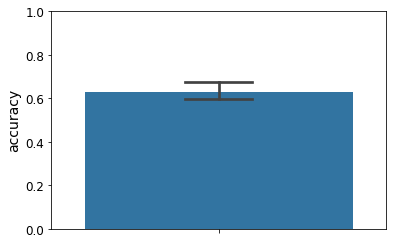

In [17]:

# sns.set(style="ticks")
ax = sns.barplot(y="accuracy", data=all_subj_metrics_df, capsize=.2)
# sns.catplot(y="accuracy",data=all_subj_metrics_df)sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="box")

plt.ylim([0 ,1]);

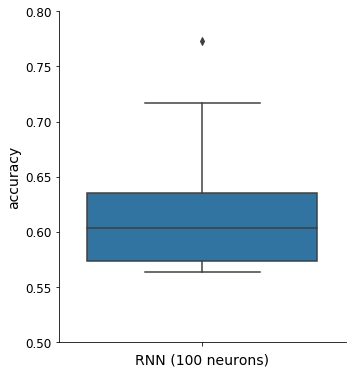

In [18]:
# sns.catplot(y="accuracy",data=all_subj_metrics_df)
sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="box")
# sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="violin")

plt.ylim([0.5,0.8])
plt.xlabel('RNN (100 neurons)');

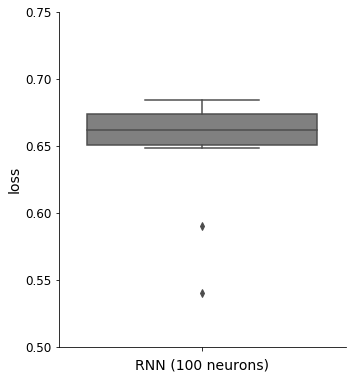

In [19]:
sns.catplot(y="loss",data=all_subj_metrics_df,kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
plt.ylim([0.5,0.75])
plt.xlabel('RNN (100 neurons)');

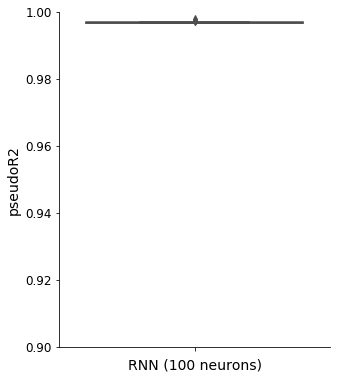

In [28]:
sns.catplot(y="pseudoR2",data=all_subj_metrics_df,kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
# plt.ylim([0.5,0.75])
plt.ylim([0.9,1])
plt.xlabel('RNN (100 neurons)');

# PT

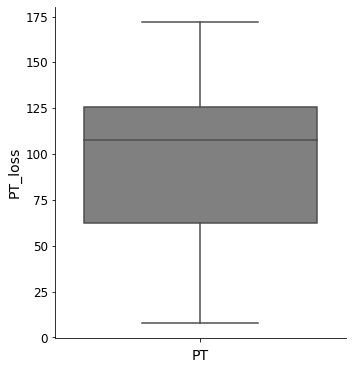

In [20]:
sns.catplot(y="PT_loss",data = PT_metrics.loc[0:14,:],kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
# plt.ylim([0.5,0.75])
plt.xlabel('PT');

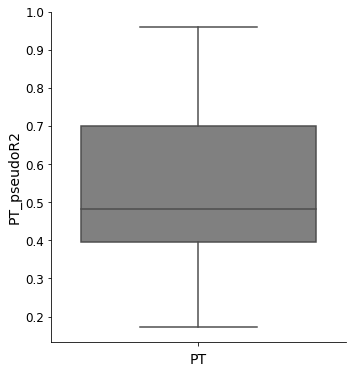

In [34]:
sns.catplot(y="PT_pseudoR2",data = PT_metrics.loc[0:14,:],kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
# plt.ylim([0.5,0.75])
plt.xlabel('PT');

# Comparisons and WilcoxonSigned Rank test

In [21]:
sc_stats.wilcoxon(all_subj_metrics_df.loss,PT_metrics.loc[0:14].PT_loss)

WilcoxonResult(statistic=0.0, pvalue=0.0006549583433856954)

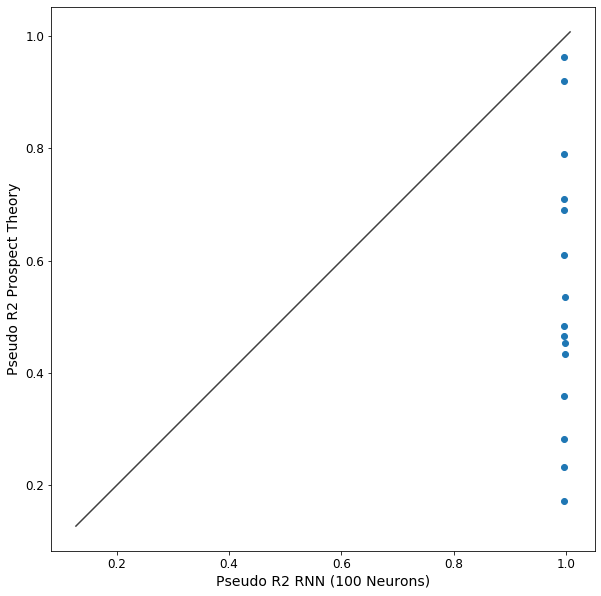

In [40]:
fig,ax= plt.subplots(figsize=(10,10))
ax.scatter(all_subj_metrics_df.pseudoR2,PT_metrics.loc[0:14].PT_pseudoR2)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 RNN (100 Neurons)',Fontsize=14);
ax.set_ylabel('Pseudo R2 Prospect Theory',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);

In [35]:
sc_stats.wilcoxon(all_subj_metrics_df.pseudoR2,PT_metrics.loc[0:14].PT_pseudoR2)

WilcoxonResult(statistic=0.0, pvalue=0.0006549583433856954)